In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.inspection import permutation_importance
from sklearn.utils.validation import check_is_fitted
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import shap
import matplotlib.pyplot as plt


In [21]:
df=pd.read_csv("CVD_preprocessed.csv")


In [22]:
df

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,3,2,0,0,0,0,0,0,1,0,10,0.39,0.03,0.03,1,0.00,0.25,0.12,0.09
1,4,4,0,1,0,0,0,2,0,0,10,0.49,0.19,0.19,0,0.00,0.25,0.00,0.03
2,4,4,1,0,0,0,0,2,0,0,8,0.48,0.24,0.25,0,0.13,0.10,0.02,0.12
3,3,4,1,1,0,0,0,2,0,1,11,0.59,0.26,0.19,0,0.00,0.25,0.23,0.06
4,2,4,0,0,0,0,0,0,0,1,12,0.67,0.24,0.14,1,0.00,0.07,0.03,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308769,4,4,1,0,0,0,0,0,0,1,1,0.51,0.21,0.20,0,0.13,0.25,0.06,0.00
308770,1,3,1,0,0,0,0,2,0,1,9,0.59,0.17,0.11,0,0.27,0.12,0.47,0.03
308771,4,0,1,0,0,0,1,3,0,0,2,0.44,0.14,0.15,1,0.13,0.33,0.06,0.03
308772,4,4,1,0,0,0,0,0,0,1,9,0.61,0.20,0.13,0,0.10,0.25,0.09,0.00


In [23]:
X=df.drop(columns=["Heart_Disease"])

In [24]:
y=df["Heart_Disease"]

In [25]:
scaler=StandardScaler()

In [26]:
X_scaled = scaler.fit_transform(X)

In [27]:
smote = SMOTE(sampling_strategy=0.5, random_state=42) 

In [28]:
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42, stratify=y_resampled
)

In [30]:
print(pd.Series(y_resampled).value_counts(normalize=True))

0    0.666667
1    0.333333
Name: Heart_Disease, dtype: float64


In [31]:
rf_model = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model.fit(X_train, y_train)
rf_preds = rf_model.predict(X_test)
print("Random Forest Performance:\n", classification_report(y_test, rf_preds))


Random Forest Performance:
               precision    recall  f1-score   support

           0       0.93      0.99      0.96     56761
           1       0.97      0.85      0.91     28380

    accuracy                           0.94     85141
   macro avg       0.95      0.92      0.93     85141
weighted avg       0.94      0.94      0.94     85141



In [32]:
rf_preds = rf_model.predict(X_test)

In [33]:
cm = confusion_matrix(y_test, rf_preds)

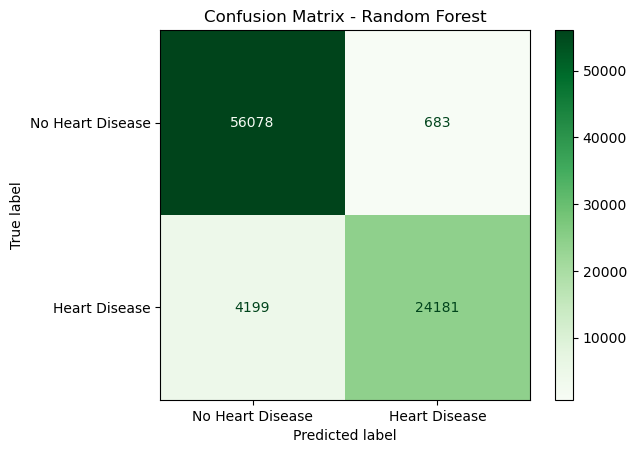

In [34]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["No Heart Disease", "Heart Disease"])
disp.plot(cmap="Greens", values_format="d")
plt.title("Confusion Matrix - Random Forest")
plt.show()

In [35]:
tn, fp, fn, tp = cm.ravel()

In [36]:
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")

True Negatives (TN): 56078
False Positives (FP): 683
False Negatives (FN): 4199
True Positives (TP): 24181


In [37]:
from sklearn.metrics import precision_recall_curve

y_probs = rf_model.predict_proba(X_test)[:, 1]


precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

threshold = 0.4
new_preds = (y_probs > threshold).astype(int)


new_cm = confusion_matrix(y_test, new_preds)
print(new_cm)


[[54860  1901]
 [ 3200 25180]]


In [38]:


smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)



In [ ]:
from imblearn.combine import SMOTETomek

smt = SMOTETomek(random_state=42)
X_resampled, y_resampled = smt.fit_resample(X_train, y_train)


In [ ]:
rf_model = RandomForestClassifier(class_weight={0:1, 1:2}, random_state=42)


In [ ]:
from sklearn.metrics import precision_recall_curve, confusion_matrix

rf_model.fit(X_train, y_train)  
y_probs = rf_model.predict_proba(X_test)[:, 1]  


precisions, recalls, thresholds = precision_recall_curve(y_test, y_probs)

threshold = 0.4
new_preds = (y_probs > threshold).astype(int)


new_cm = confusion_matrix(y_test, new_preds)


tn, fp, fn, tp = new_cm.ravel()
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"True Positives (TP): {tp}")


In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, precision_recall_curve

y_probs = rf_model.predict_proba(X_test)[:, 1]  

threshold = 0.35
y_preds_new = (y_probs > threshold).astype(int)  


conf_matrix = confusion_matrix(y_test, y_preds_new)
class_report = classification_report(y_test, y_preds_new)


print("Confusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", class_report)


In [ ]:
result = permutation_importance(rf_model, X_test, y_test, n_repeats=5, random_state=42, n_jobs=-1)

In [ ]:
if isinstance(X_train, pd.DataFrame):
    features = X_train.columns  
else:
    features = [f"Feature {i}" for i in range(X_train.shape[1])]  

In [ ]:

check_is_fitted(rf_model)

feature_importances = rf_model.feature_importances_

if isinstance(X_train, pd.DataFrame):
    features = np.array(X_train.columns)  
else:
    features = np.array([f"Feature {i}" for i in range(X_train.shape[1])])  # Generate names


indices = np.argsort(feature_importances)[::-1]

top_n = min(20, len(features))

plt.figure(figsize=(10, 5))
plt.title("Top Feature Importances")
plt.bar(range(top_n), feature_importances[indices][:top_n], align="center")
plt.xticks(range(top_n), features[indices][:top_n], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()
